# Graphs and Biological Networks

**Эс зэрэг төрөл бүрийн биологийн системийг дүрслэх, симуляц хийхэд ашигладаг**
   - уураг кодлодог генүүд,
   - урвалд оролцож буй метаболитууд (metabolites),
   - ген хөрвүүлэлтийг зохицуулдаг эсвэл нэгдлүүд рүү холбогддог уургууд

# MyGraph

In [6]:
class MyGraph:

    def __init__(self, g = {}):
        ''' Constructor - takes dictionary to fill the graph as input; default is empty dictionary '''
        self.graph = g    

    def print_graph(self):
        ''' Prints the content of the graph as adjacency list '''
        for v in self.graph.keys():
            print (v, " -> ", self.graph[v])

    ## get basic info

    def get_nodes(self):
        ''' Returns list of nodes in the graph '''
        return list(self.graph.keys())
        
    def get_edges(self): 
        ''' Returns edges in the graph as a list of tuples (origin, destination) '''
        edges = []
        for v in self.graph.keys():
            for d in self.graph[v]:
                edges.append((v,d))
        return edges
      
    def size(self):
        ''' Returns size of the graph : number of nodes, number of edges '''
        return len(self.get_nodes()), len(self.get_edges())
      
    ## add nodes and edges    
    
    def add_vertex(self, v):
        ''' Add a vertex to the graph; tests if vertex exists not adding if it does '''
        if v not in self.graph.keys():
            self.graph[v] = []
        
    def add_edge(self, o, d):
        ''' Add edge to the graph; if vertices do not exist, they are added to the graph ''' 
        if o not in self.graph.keys():
            self.add_vertex(o)
        if d not in self.graph.keys():
            self.add_vertex(d)  
        if d not in self.graph[o]:
            self.graph[o].append(d)

    ## successors, predecessors, adjacent nodes
        
    def get_successors(self, v):
        return list(self.graph[v])     # needed to avoid list being overwritten of result of the function is used           
             
    def get_predecessors(self, v):
        res = []
        for k in self.graph.keys(): 
            if v in self.graph[k]: 
                res.append(k)
        return res
    
    def get_adjacents(self, v):
        suc = self.get_successors(v)
        pred = self.get_predecessors(v)
        res = pred
        for p in suc: 
            if p not in res: res.append(p)
        return res
        
    ## degrees    
    
    def out_degree(self, v):
        return len(self.graph[v])
    
    def in_degree(self, v):
        return len(self.get_predecessors(v))
        
    def degree(self, v):
        return len(self.get_adjacents(v))
        
    def all_degrees(self, deg_type = "inout"):
        ''' Computes the degree (of a given type) for all nodes.
        deg_type can be "in", "out", or "inout" '''
        degs = {}
        for v in self.graph.keys():
            if deg_type == "out" or deg_type == "inout":
                degs[v] = len(self.graph[v])
            else: degs[v] = 0
        if deg_type == "in" or deg_type == "inout":
            for v in self.graph.keys():
                for d in self.graph[v]:
                    if deg_type == "in" or v not in self.graph[d]:
                        degs[d] = degs[d] + 1
        return degs
    
    # Зангилааг ач холбогдлоор нь эрэмбэлэх хамгийн энгийн арга бол илүү олон хөрштэй байх
    # Бодисын солилцооны сүлжээнд (жнь, "метаболит-метаболит") хэрэглэснээр олон урвалын гол хүчин 
    # зүйл болох highly-connected метаболитуудыг тодорхойлно.
    # Заримдаа шинжилгээг хялбар болгохын тулд эдгээр метаболитуудыг устгах нь түгээмэл байдаг.
    def highest_degrees(self, all_deg= None, deg_type = "inout", top= 10):
        if all_deg is None: 
            all_deg = self.all_degrees(deg_type)
        ord_deg = sorted(list(all_deg.items()), key=lambda x : x[1], reverse = True)
        return list(map(lambda x:x[0], ord_deg[:top]))
        
    
    ## topological metrics over degrees
    
    # Дундаж зэрэг(mean degree) k
    # Графын бүх зангилаа дээрх зэргийн дундаж утга.
    # Чиглэлт графын хувьд энэ утгыг оролтын, гаралтын зэрэг (in-degrees, out-degrees) тооцоолж болно.
    # Сүлжээний холболтын бүх түвшинд үнэлж болно
    def mean_degree(self, deg_type = "inout"):
        degs = self.all_degrees(deg_type)
        return sum(degs.values()) / float(len(degs))
        
    def prob_degree(self, deg_type = "inout"):
        degs = self.all_degrees(deg_type)
        res = {}
        for k in degs.keys():
            if degs[k] in res.keys():
                res[degs[k]] += 1
            else:
                res[degs[k]] = 1
        for k in res.keys():
            res[k] /= float(len(degs))
        return res    
    
    
    ## BFS and DFS searches    
    
    def reachable_bfs(self, v):
        l = [v]
        res = []
        while len(l) > 0:
            node = l.pop(0)
            if node != v: res.append(node)
            for elem in self.graph[node]:
                if elem not in res and elem not in l and elem != node:
                    l.append(elem)
        return res
        
    def reachable_dfs(self, v):
        l = [v]
        res = []
        while len(l) > 0:
            node = l.pop(0)
            if node != v: res.append(node)
            s = 0
            for elem in self.graph[node]:
                if elem not in res and elem not in l:
                    l.insert(s, elem)
                    s += 1
        return res    
    
    def distance(self, s, d):
        if s == d: return 0
        l = [(s,0)]
        visited = [s]
        while len(l) > 0:
            node, dist = l.pop(0)
            for elem in self.graph[node]:
                if elem == d: return dist + 1
                elif elem not in visited: 
                    l.append((elem,dist+1))
                    visited.append(elem)
        return None
        
    def shortest_path(self, s, d):
        if s == d: return 0
        l = [(s,[])]
        visited = [s]
        while len(l) > 0:
            node, preds = l.pop(0)
            for elem in self.graph[node]:
                if elem == d: return preds+[node,elem]
                elif elem not in visited: 
                    l.append((elem,preds+[node]))
                    visited.append(elem)
        return None
        
    def reachable_with_dist(self, s):
        res = []
        l = [(s,0)]
        while len(l) > 0:
            node, dist = l.pop(0)
            if node != s: res.append((node,dist))
            for elem in self.graph[node]:
                if not is_in_tuple_list(l,elem) and not is_in_tuple_list(res,elem): 
                    l.append((elem,dist+1))
        return res
 
    ## mean distances ignoring unreachable nodes
    
    # 2 Зангилааны хоорондох хамгийн богино замын уртад суурилан сүлжээний глобал хэмжигдэхүүнүүдийг тооцоол. 
    def mean_distances(self):
        tot = 0
        num_reachable = 0
        for k in self.graph.keys(): 
            distsk = self.reachable_with_dist(k)
            for _, dist in distsk:
                tot += dist
            num_reachable += len(distsk)
        meandist = float(tot) / num_reachable
        n = len(self.get_nodes())
        return meandist, float(num_reachable)/((n-1)*n)  
    
    
    # Зангилаа хэдий чинээ төвлөрөлтэй байх тусам бусад бүх зангилаатай ойрхон байна
    # Холбоост графуудад (эсвэл бараг холбогдсон графуудад) тохиромжтой.
    # Хэрэв холболтгүй хос зангилаа байвал тооцооллоос хасна.
    # Эдгээр хосууд сүлжээнд олон байвал энэ нь үр дүнд ихээхэн нөлөөлнө. 
    def closeness_centrality(self, node):
        dist = self.reachable_with_dist(node)
        if len(dist)==0: return 0.0
        s = 0.0
        for d in dist: s += d[1]
        return len(dist) / s
        
    
    def highest_closeness(self, top = 10): 
        cc = {}
        for k in self.graph.keys():
            cc[k] = self.closeness_centrality(k)
        print(cc)
        ord_cl = sorted(list(cc.items()), key=lambda x : x[1], reverse = True)
        return list(map(lambda x:x[0], ord_cl[:top]))
            
    # Сүлжээн дэх хос зангилааны хоорондох хамгийн богино зам дээр суурилна.
    # Энэ хэмжигдэхүүн нь бүх хос зангилааны хоорондох зам нь тухайн зангилаагаар дамжих хамгийн
    # богино замын эзлэх хувь байна.
        # 0-ээс 1 хүртэлх утгыг авна
    # Тухайн зангилааг агуулсан сүлжээн дэх хамгийн богино замуудын харьцааг тооцоолох замаар салангид кластеруудын хооронд гүүр болох зангилааны үүргийг хэмждэг.
    def betweenness_centrality(self, node):
        total_sp = 0
        sps_with_node = 0
        for s in self.graph.keys(): 
            for t in self.graph.keys(): 
                if s != t and s != node and t != node:
                    sp = self.shortest_path(s, t)
                    if sp is not None:
                        total_sp += 1
                        if node in sp: sps_with_node += 1 
        return sps_with_node / total_sp
                    
    ## cycles    
    def node_has_cycle (self, v):
        l = [v]
        res = False
        visited = [v]
        while len(l) > 0:
            node = l.pop(0)
            for elem in self.graph[node]:
                if elem == v: return True
                elif elem not in visited: 
                    l.append(elem)
                    visited.append(elem)
        return res       
    
    def has_cycle(self):
        res = False
        for v in self.graph.keys():
            if self.node_has_cycle(v): return True
        return res

    ## clustering
       
    # Хөршүүдийн хоорондох ирмэгүүдийн тоо мөн тэнд байж болох ирмэгүүдийн тооны харьцаагаар тодорхойлогддог
    def clustering_coef(self, v):
        adjs = self.get_adjacents(v)
        if len(adjs) <=1: return 0.0
        ligs = 0
        for i in adjs:
            for j in adjs:
                if i != j:
                    if j in self.graph[i] or i in self.graph[j]: 
                        ligs = ligs + 1
        return float(ligs)/(len(adjs)*(len(adjs)-1))
        
    def all_clustering_coefs(self):
        ccs = {}
        for k in self.graph.keys():
            ccs[k] = self.clustering_coef(k)
        return ccs
        
    def mean_clustering_coef(self):
        ccs = self.all_clustering_coefs()
        return sum(ccs.values()) / float(len(ccs))
            
    def mean_clustering_perdegree(self, deg_type = "inout"):
        degs = self.all_degrees(deg_type)
        ccs = self.all_clustering_coefs()
        degs_k = {}
        for k in degs.keys():
            if degs[k] in degs_k.keys(): degs_k[degs[k]].append(k)
            else: degs_k[degs[k]] = [k]
        ck = {}
        for k in degs_k.keys():
            tot = 0
            for v in degs_k[k]: tot += ccs[v]
            ck[k] = float(tot) / len(degs_k[k])
        return ck

def is_in_tuple_list(tl, val):
    res = False
    for (x,y) in tl:
        if val == x: return True
    return res

# Metabolic Networks

In [23]:
# Файлаас мэдээллийг ачаалж, классын сүлжээний төрлөөр сүлжээг үүсгэдэг.
# Харих урвалыг хэрхэн зохицуулахыг зааж өгсөн флаг хувьсагчийг хэрэглэнэ.
# Эхлээд "метаболит-урвал" үүснэ.
# Өөр сүлжээ хэрэгтэй бол **convert_metabolite_net, convert_reaction_graph** функцийг ашиглана.
class MetabolicNetwork(MyGraph):
    
    def __init__(self, network_type = "metabolite-reaction", split_rev = False):
        MyGraph.__init__(self, {})
        self.net_type = network_type
        self.node_types = {}
        if network_type == "metabolite-reaction":
            self.node_types["metabolite"] = []
            self.node_types["reaction"] = []
        self.split_rev =  split_rev
    
    def add_vertex_type(self, v, nodetype):
        self.add_vertex(v)
        self.node_types[nodetype].append(v)
    
    def get_nodes_type(self, node_type):
        if node_type in self.node_types:
            return self.node_types[node_type]
        else: return None
    
    # тусгаарлагчийг ашиглан оролтын str тэмдэгт мөр дээр ажиллана, (regular expression-тэй ижил)
    # str-г тусгаарлагчийн илрэлүүдээр хувааж дэд тэмдэгт мөрүүд (tokens)-ийн жагсаалт болгоно.
    def load_from_file(self, filename):
        rf = open(filename)
        gmr = MetabolicNetwork("metabolite-reaction")
        for line in rf:
            if ":" in line:
                tokens = line.split(":")
                reac_id = tokens[0].strip()
                gmr.add_vertex_type(reac_id, "reaction")
                rline = tokens[1]
            else: raise Exception("Invalid line:")                
            if "<=>" in rline:
                left, right = rline.split("<=>")
                mets_left = left.split("+")
                for met in mets_left:
                    met_id = met.strip()
                    if met_id not in gmr.graph:
                        gmr.add_vertex_type(met_id, "metabolite")
                    if self.split_rev:
                        gmr.add_vertex_type(reac_id+"_b", "reaction")
                        gmr.add_edge(met_id, reac_id)
                        gmr.add_edge(reac_id+"_b", met_id)
                    else:
                        gmr.add_edge(met_id, reac_id)
                        gmr.add_edge(reac_id, met_id)
                mets_right = right.split("+")
                for met in mets_right:
                    met_id = met.strip()
                    if met_id not in gmr.graph:
                        gmr.add_vertex_type(met_id, "metabolite")
                    if self.split_rev:
                        gmr.add_edge(met_id, reac_id+"_b")
                        gmr.add_edge(reac_id, met_id)
                    else:
                        gmr.add_edge(met_id, reac_id)
                        gmr.add_edge(reac_id, met_id)
            elif "=>" in line:
                left, right = rline.split("=>")
                mets_left = left.split("+")
                for met in mets_left:
                    met_id = met.strip()
                    if met_id not in gmr.graph:
                        gmr.add_vertex_type(met_id, "metabolite")
                    gmr.add_edge(met_id, reac_id)
                mets_right = right.split("+")
                for met in mets_right:
                    met_id = met.strip()
                    if met_id not in gmr.graph:
                        gmr.add_vertex_type(met_id, "metabolite")
                    gmr.add_edge(reac_id, met_id)
            else: raise Exception("Invalid line:")    

        
        if self.net_type == "metabolite-reaction": 
            self.graph = gmr.graph
            self.node_types = gmr.node_types
        elif self.net_type == "metabolite-metabolite":
            self.convert_metabolite_net(gmr)
        elif self.net_type == "reaction-reaction": 
            self.convert_reaction_graph(gmr)
        else: self.graph = {}
        
        
    def convert_metabolite_net(self, gmr):
        for m in gmr.node_types["metabolite"]:
            self.add_vertex(m)
            sucs = gmr.get_successors(m)
            for s in sucs:
                sucs_r = gmr.get_successors(s)
                for s2 in sucs_r:
                    if m != s2: 
                        self.add_edge(m, s2)
        
    def convert_reaction_graph(self, gmr): 
        for r in gmr.node_types["reaction"]:
            self.add_vertex(r)
            sucs = gmr.get_successors(r)
            for s in sucs:
                sucs_r = gmr.get_successors(s)
                for s2 in sucs_r:
                    if r != s2: self.add_edge(r, s2)
      
    ## assessing metabolic potential      
    def active_reactions(self, active_metabolites):
        if self.net_type != "metabolite-reaction" or not self.split_rev:
            return None
        res = []
        for v in self.node_types['reaction']:
            preds = set(self.get_predecessors(v))
            if len(preds)>0 and preds.issubset(set(active_metabolites)):
                res.append(v)
        return res
        
    def produced_metabolites(self, active_reactions):
        res = []
        for r in active_reactions:
            sucs = self.get_successors(r)
            for s in sucs:
                if s not in res: res.append(s)
        return res
        
    def all_produced_metabolites(self, initial_metabolites):
        mets = initial_metabolites
        cont = True
        while cont:
            cont = False
            reacs = self.active_reactions(mets)
            new_mets = self.produced_metabolites(reacs)
            for nm in new_mets: 
                if nm not in mets: 
                    mets.append(nm)
                    cont = True
        return mets
    #exercise 1
    def final_metabolites(self):
        res = []
        for v in self.graph.keys():
            if v[0] == "M":
                print(self.get_successors(v))
                if len(self.get_predecessors(v)) > 0:
                    if self.get_successors(v) == []:
                        res.append(v)
        return res

## Exercises

1. **Considering the networks of the type “metabolite-reaction” presented in this chapter,
which correspond to bipartite graphs, write a method to add to the class Metabolic-
Network that can detect the set of “final” metabolites, those that are produced by at least
one reaction, but are not consumed by any reaction in the network.**

In [24]:
def test1():
    m = MetabolicNetwork("metabolite-reaction")
    m.add_vertex_type("R1","reaction")
    m.add_vertex_type("R2","reaction")
    m.add_vertex_type("R3","reaction")
    m.add_vertex_type("M1","metabolite")
    m.add_vertex_type("M2","metabolite")
    m.add_vertex_type("M3","metabolite")
    m.add_vertex_type("M4","metabolite")
    m.add_vertex_type("M5","metabolite")
    m.add_vertex_type("M6","metabolite")
    m.add_edge("M1","R1")
    m.add_edge("M2","R1")
    m.add_edge("R1","M3")
    m.add_edge("R1","M4")
    m.add_edge("M4","R2")
    m.add_edge("M6","R2")
    m.add_edge("R2","M3")
    m.add_edge("M4","R3")
    m.add_edge("M5","R3")
    m.add_edge("R3","M6")
    m.add_edge("R3","M4")
    m.add_edge("R3","M5")
    m.add_edge("M6","R3")
    #m.print_graph()
    print("Reactions: ", m.get_nodes_type("reaction"))
    print("Metabolites: ", m.get_nodes_type("metabolite"))
    print()
    
    # exercise 1
    print(m.final_metabolites())

test1()

Reactions:  ['R1', 'R2', 'R3']
Metabolites:  ['M1', 'M2', 'M3', 'M4', 'M5', 'M6']

['R1']
['R1']
[]
['R2', 'R3']
['R3']
['R2', 'R3']
['M3']


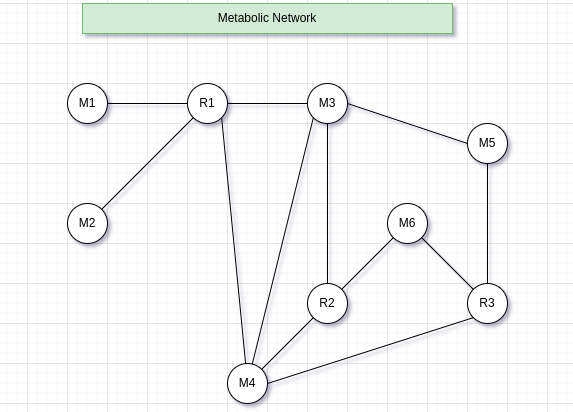

NameError: name 'm' is not defined

In [11]:
def test2():
    
    print("metabolite-reaction network:")
    mrn = MetabolicNetwork("metabolite-reaction")
    mrn.load_from_file("example-net.txt")
    mrn.print_graph()
    print("Reactions: ", mrn.get_nodes_type("reaction") )
    print("Metabolites: ", mrn.get_nodes_type("metabolite") )
    print()
    
    print("metabolite-metabolite network:")
    mmn = MetabolicNetwork("metabolite-metabolite")
    mmn.load_from_file("example-net.txt")
    mmn.print_graph()
    print()
    
    print("reaction-reaction network:")
    rrn = MetabolicNetwork("reaction-reaction")
    rrn.load_from_file("example-net.txt")
    rrn.print_graph()
    print()
    
    print("metabolite-reaction network (splitting reversible):")
    mrsn = MetabolicNetwork("metabolite-reaction", True)
    mrsn.load_from_file("example-net.txt")
    mrsn.print_graph()
    print()
    
    print("reaction-reaction network (splitting reversible):")
    rrsn = MetabolicNetwork("reaction-reaction", True)
    rrsn.load_from_file("example-net.txt")
    rrsn.print_graph()
    print()
    
    print(mmn.mean_degree("out")) 
    print(mmn.prob_degree("out"))
    
    print(mmn.mean_distances())
    print(mrn.mean_distances())
    
    print(mmn.all_clustering_coefs())
    print(mmn.mean_clustering_coef())
    print(mmn.mean_clustering_perdegree())
    
    print(mmn.highest_degrees(top = 3)) 
    print(mmn.highest_closeness(top = 3))
    
    print(mmn.betweenness_centrality("M5"))

test2()

metabolite-reaction network:


FileNotFoundError: [Errno 2] No such file or directory: 'example-net.txt'

### Network Topological Analysis

In [4]:
def test3():
    print("metabolite-reaction network:")
    ec_mrn = MetabolicNetwork("metabolite-reaction")
    ec_mrn.load_from_file("ecoli.txt")
    print("Size:", ec_mrn.size())
    
    print("Mean degree: ", ec_mrn.mean_degree("inout")) 
    pd = ec_mrn.prob_degree("inout")
    pdo = sorted( list (pd.items()), key=lambda x : x[0]) 
    print("Histogram of degree probabilities")
    for (x,y) in pdo: print(x, "->", y)        
    print("Mean distance (M-R): ", ec_mrn.mean_distances())
    print()    
    
    print("metabolite-metabolite network:")
    ec_mmn = MetabolicNetwork("metabolite-metabolite")
    ec_mmn.load_from_file("ecoli.txt")
    print(ec_mmn.size())
    
    print("Mean degree: ", ec_mmn.mean_degree("inout")) 
    pd = ec_mmn.prob_degree("inout")
    pdo = sorted(list(pd.items()), key=lambda x : x[0])
    print("Histogram of degree probabilities")
    for (x,y) in pdo: print(x, "->", y)    
    
    print("Mean distance (M-M): ", ec_mmn.mean_distances()) 

    print(ec_mmn.mean_clustering_coef())
    cc = ec_mmn.mean_clustering_perdegree()
    cco = sorted(list(cc.items()), key=lambda x : x[0])
    print("Clustering coefficients per degree")
    for (x,y) in cco: print(x, "->", y)
        
    print(ec_mmn.highest_degrees(top = 20))
    print(ec_mmn.highest_closeness(top = 20))
    print()    
    
    print("reaction-reaction network:")
    ec_rrn = MetabolicNetwork("reaction-reaction")
    ec_rrn.load_from_file("ecoli.txt")
    print(ec_rrn.size())
    
    print("Mean degree: ", ec_rrn.mean_degree("inout")) 
    pd = ec_rrn.prob_degree("inout")
    pdo = sorted(list(pd.items()), key=lambda x : x[0])
    print("Histogram of degree probabilities")
    for (x,y) in pdo: print(x, "->", y)

test3()

metabolite-reaction network:


FileNotFoundError: [Errno 2] No such file or directory: 'ecoli.txt'

In [5]:
def test4():
    mrsn = MetabolicNetwork("metabolite-reaction", True)
    mrsn.load_from_file("example-net.txt")
    mrsn.print_graph()
    
    print(mrsn.produced_metabolites(["R1"]))
    print(mrsn.active_reactions(["M1","M2"]))
    print(mrsn.all_produced_metabolites(["M1","M2"]))
    print(mrsn.all_produced_metabolites(["M6"]))

test4()

FileNotFoundError: [Errno 2] No such file or directory: 'example-net.txt'